In [1]:
from sweeping import Sweeper
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
sweeper = Sweeper.from_jsonfile("config-targeted.json", log_dir="logs_targeted")

In [3]:
sweeper.config_df

,dataset,norm,attack,model,binary_search_steps,loss_f,steps,target,α_final,α_init,γ_final,γ_init,init_lr_distance,num_steps,α
0,CIFAR10,L1,alma_t,Augustin2020Adversarial_34_10_extra,<NA>,DL,<NA>,0,<NA>,<NA>,<NA>,<NA>,0.5,100,0.5
1,CIFAR10,L1,alma_t,Augustin2020Adversarial_34_10_extra,<NA>,DL,<NA>,1,<NA>,<NA>,<NA>,<NA>,0.5,100,0.5
2,CIFAR10,L1,alma_t,Augustin2020Adversarial_34_10_extra,<NA>,DL,<NA>,2,<NA>,<NA>,<NA>,<NA>,0.5,100,0.5
3,CIFAR10,L1,alma_t,Augustin2020Adversarial_34_10_extra,<NA>,DL,<NA>,3,<NA>,<NA>,<NA>,<NA>,0.5,100,0.5
4,CIFAR10,L1,alma_t,Augustin2020Adversarial_34_10_extra,<NA>,DL,<NA>,4,<NA>,<NA>,<NA>,<NA>,0.5,100,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,CIFAR10,Linf,fmn_t,Rebuffi2021Fixing_70_16_cutmix_extra_linf,10,DL,100,8,0.0001,1000,0.001,0.05,<NA>,<NA>,<NA>
796,CIFAR10,Linf,fmn_t,Rebuffi2021Fixing_70_16_cutmix_extra_linf,10,DL,100,9,0.0001,1,0.001,0.05,<NA>,<NA>,<NA>
797,CIFAR10,Linf,fmn_t,Rebuffi2021Fixing_70_16_cutmix_extra_linf,10,DL,100,9,0.0001,10,0.001,0.05,<NA>,<NA>,<NA>
798,CIFAR10,Linf,fmn_t,Rebuffi2021Fixing_70_16_cutmix_extra_linf,10,DL,100,9,0.0001,100,0.001,0.05,<NA>,<NA>,<NA>


In [4]:
sweeper.logger.load_all()

In [11]:
sweeper.save_df()
sweeper.sweep(n_samples=200, device=None, recompute=False, batch_size=200)
sweeper.save_df()

dataset-CIFAR10-norm-L1-attack-alma_t-model-Augustin2020Adversarial_34_10_extra-init_lr_distance-0.5-loss_f-DL-num_steps-100-target-0-α-0.5
dataset-CIFAR10-norm-L1-attack-alma_t-model-Augustin2020Adversarial_34_10_extra-init_lr_distance-0.5-loss_f-DL-num_steps-100-target-1-α-0.5
dataset-CIFAR10-norm-L1-attack-alma_t-model-Augustin2020Adversarial_34_10_extra-init_lr_distance-0.5-loss_f-DL-num_steps-100-target-2-α-0.5
dataset-CIFAR10-norm-L1-attack-alma_t-model-Augustin2020Adversarial_34_10_extra-init_lr_distance-0.5-loss_f-DL-num_steps-100-target-3-α-0.5
dataset-CIFAR10-norm-L1-attack-alma_t-model-Augustin2020Adversarial_34_10_extra-init_lr_distance-0.5-loss_f-DL-num_steps-100-target-4-α-0.5
dataset-CIFAR10-norm-L1-attack-alma_t-model-Augustin2020Adversarial_34_10_extra-init_lr_distance-0.5-loss_f-DL-num_steps-100-target-5-α-0.5
dataset-CIFAR10-norm-L1-attack-alma_t-model-Augustin2020Adversarial_34_10_extra-init_lr_distance-0.5-loss_f-DL-num_steps-100-target-6-α-0.5
dataset-CIFAR10-norm

In [12]:
# sweeper.logger.where(model="Maini2020MultipleAVG")

In [7]:
settings = {"attack":"", "model":"Eng", "-norm":"Linf", "norm":"Linf"}

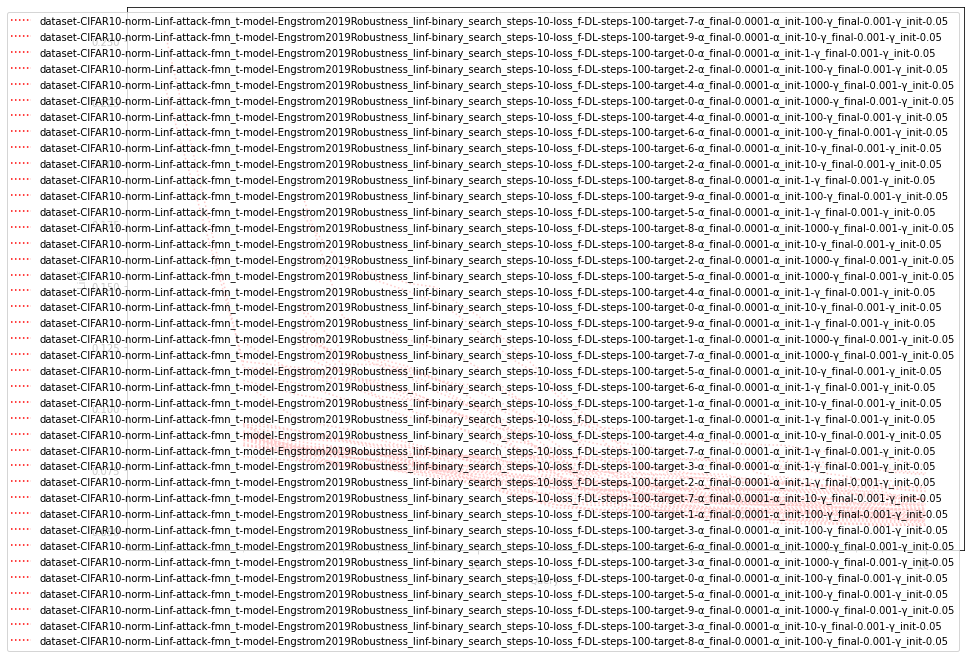

In [8]:
import matplotlib.pyplot as plt

# todo - put this into functions in some plot_utils file
# tofo - support filtering/splitting into multiple plots (e.g. plot only one model)

plt.figure(figsize=(15,10))
keys = []
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_QD(key)
    keys.append(key)
plt.legend(keys)#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel(settings["norm"])
plt.xlabel("Query")
plt.xscale('log')
None

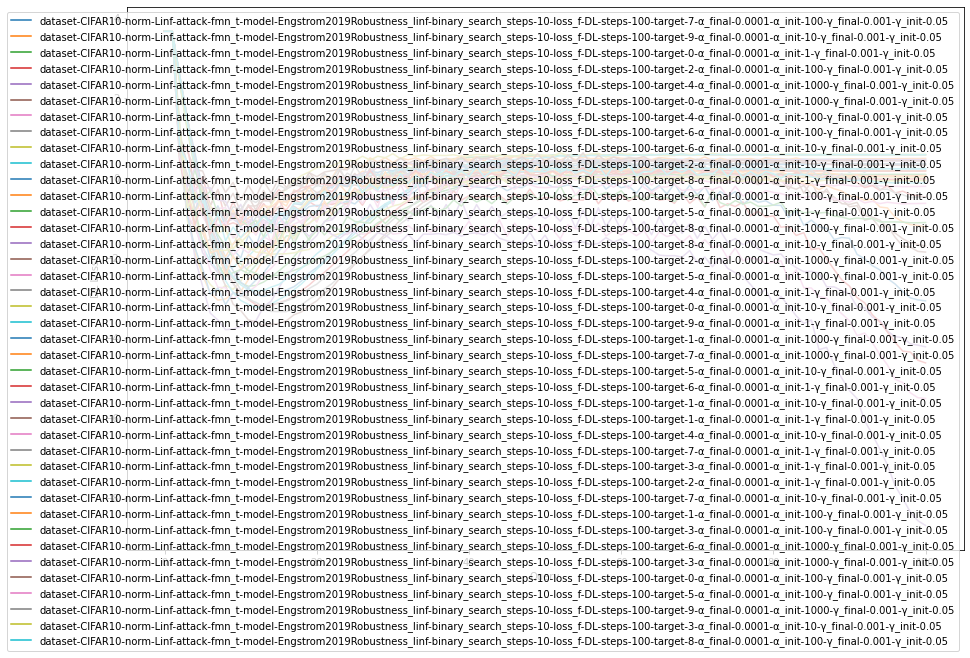

In [9]:
plt.figure(figsize=(15,10))
keys = []
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_progress(kind="loss", run_id=key)
    keys.append(key)
plt.legend(keys)#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("DL Loss")
plt.xlabel("Query")
None

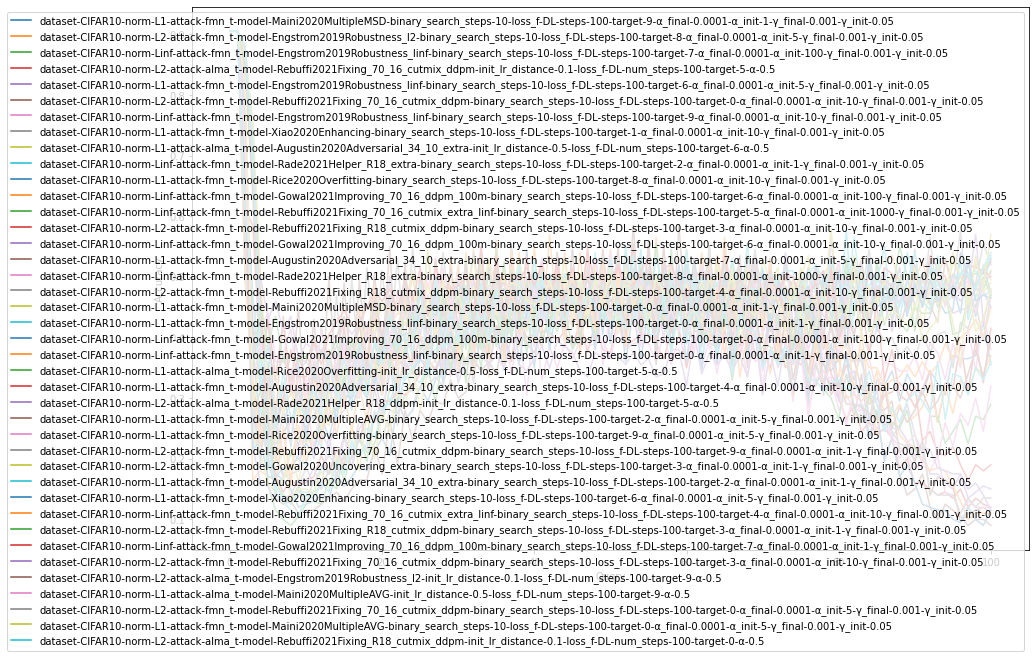

In [10]:
plt.figure(figsize=(15,10))
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_progress(kind="acc", run_id=key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("Accuracy")
plt.xlabel("Query")
None